# Inżynieria cech

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 
import math
import warnings
warnings.filterwarnings('ignore')
from pandas_profiling import ProfileReport

from category_encoders import OneHotEncoder

# Wczytanie danych

In [2]:
grades_df=pd.read_csv('https://lovespreadsheet-tutorials.s3.amazonaws.com/APIDatasets/school_grades_dataset.csv')
grades_df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [3]:
grades_changed=grades_df.copy()
grades_changed

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


Jak widać wiele kolumn zawiera wartości inne niż takie będące liczbowymi. Stąd by przeprowadzić lepsze modelowanie, postanowiliśmy zamienić je na wartości numeryczne.

In [4]:
categorical = grades_df.select_dtypes(include=np.object).columns.tolist()
categorical_multi = ['Mjob', 'Fjob', 'guardian', 'reason']
categorical.remove('Mjob')
categorical.remove('Fjob')
categorical.remove('guardian')
categorical.remove('reason')

grades_changed = pd.get_dummies(grades_changed, columns=categorical, drop_first=True)
grades_changed = pd.get_dummies(grades_changed, columns=categorical_multi)
grades_changed

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,Fjob_other,Fjob_services,Fjob_teacher,guardian_father,guardian_mother,guardian_other,reason_course,reason_home,reason_other,reason_reputation
0,18,4,4,2,2,0,4,3,4,1,...,0,0,1,0,1,0,1,0,0,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,0,1,0,0,1,0,0,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,0,1,0,0,0,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,0,1,0,0,1,0,0
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,5,4,2,1,...,1,0,0,0,1,0,1,0,0,0
645,18,3,1,1,2,0,4,3,4,1,...,0,1,0,0,1,0,1,0,0,0
646,18,1,1,2,2,0,1,1,1,1,...,1,0,0,0,1,0,1,0,0,0
647,17,3,1,2,1,0,2,4,5,3,...,0,1,0,0,1,0,1,0,0,0


W naszych danych podano wyniki śródsemestralnych egzaminów dla poszczególnych studentów ("G1", "G2"), które są bardzo zbliżone do wyników ostatecznych ("G3"). Stąd zdecydowaliśmy się przygotować modele na dwóch rodzajach danych - tych zawierających kolumny "G1" oraz "G2" oraz takich, które ich nie zawierają.

In [5]:
X_without_exams = grades_changed.drop(["G1", "G2", "G3"], axis=1)
X_with_exams = grades_changed.drop("G3", axis=1)
Y = grades_changed.G3
total_results_with = pd.DataFrame(columns=["Model", "RMSE"])
total_results_without = pd.DataFrame(columns=["Model", "RMSE"])

In [6]:
from sklearn.metrics import mean_squared_error, max_error, make_scorer

def append_to_results(df, model, scores):
    return df.append(pd.DataFrame({
        "Model": np.repeat(model, scores.size),
        "RMSE": scores}))

def avg_sd_print(data):
    print(f"Average: {np.mean(data):.3f}\nStandard deviation: {np.std(data):.3f}")
    
    
metrics = {"rmse": make_scorer(mean_squared_error, squared=False)}

# Modele klasyfikacyjne

## Drzewo decyzyjne
### Z egzaminami

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_validate

simple_tree = DecisionTreeClassifier()

parameters = {"criterion": ["gini", "entropy"],
             "max_depth": [2, 4, 6, 8, 10],
             "min_samples_split": [2, 6, 10],
             "random_state": [1]}

tree_grid = GridSearchCV(simple_tree, scoring=metrics, param_grid=parameters, refit="rmse", cv=5)
tree_grid.fit(X_with_exams, Y)
grid = pd.DataFrame(tree_grid.cv_results_).sort_values(by='mean_test_rmse')
filter_col = [col for col in grid if col.startswith('param_')]
filter_col.append('mean_test_rmse')
grid[filter_col] 

,param_criterion,param_max_depth,param_min_samples_split,param_random_state,mean_test_rmse
19,entropy,4,6,1,1.565333
18,entropy,4,2,1,1.565333
20,entropy,4,10,1,1.565333
3,gini,4,2,1,1.579300
4,gini,4,6,1,1.579300
5,gini,4,10,1,1.579300
22,entropy,6,6,1,1.633985
23,entropy,6,10,1,1.655399
29,entropy,10,10,1,1.668336
26,entropy,8,10,1,1.672512


In [8]:
tree = DecisionTreeClassifier(criterion = "entropy", max_depth = 4, min_samples_split = 6, random_state = 1)

result_with = cross_validate(tree, X_with_exams, Y, scoring=metrics, cv=5)
total_results_with = append_to_results(total_results_with, "Decision Tree", result_with.get('test_rmse'))

print("Decision Tree with exams")
avg_sd_print(result_with.get('test_rmse'))

Decision Tree with exams
Average: 1.565
Standard deviation: 0.240


### Bez egzaminów

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, cross_validate

simple_tree = DecisionTreeClassifier()

parameters = {"criterion": ["gini", "entropy"],
             "max_depth": [2, 4, 6, 8, 10],
             "min_samples_split": [2, 6, 10],
             "random_state": [1]}

tree_grid = GridSearchCV(simple_tree, scoring=metrics, param_grid=parameters, refit="rmse", cv=5)
tree_grid.fit(X_without_exams, Y)
grid = pd.DataFrame(tree_grid.cv_results_).sort_values(by='mean_test_rmse')
filter_col = [col for col in grid if col.startswith('param_')]
filter_col.append('mean_test_rmse')
grid[filter_col] 

,param_criterion,param_max_depth,param_min_samples_split,param_random_state,mean_test_rmse
0,gini,2,2,1,3.336951
1,gini,2,6,1,3.336951
2,gini,2,10,1,3.336951
6,gini,6,2,1,3.474029
8,gini,6,10,1,3.607393
7,gini,6,6,1,3.610353
26,entropy,8,10,1,3.791909
29,entropy,10,10,1,3.795743
24,entropy,8,2,1,3.852419
11,gini,8,10,1,3.892847


In [10]:
tree = DecisionTreeClassifier(criterion = "gini", max_depth = 2, min_samples_split = 2, random_state = 1)

result_without = cross_validate(tree, X_without_exams, Y, scoring=metrics, cv=5)
total_results_without = append_to_results(total_results_without, "Decision Tree", result_without.get('test_rmse'))

print("Decision Tree without exams")
avg_sd_print(result_without.get('test_rmse'))

Decision Tree without exams
Average: 3.337
Standard deviation: 0.329


## Las losowy
### Z egzaminami

In [11]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

parameters = {"criterion": ["gini", "entropy"],
             "max_depth": [2, 4, 6, 8, 10],
             "min_samples_split": [2, 6, 10],
             "random_state": [1]}

rf_grid = GridSearchCV(rf, scoring=metrics, param_grid=parameters, refit="rmse", cv=5)
rf_grid.fit(X_with_exams, Y)
grid = pd.DataFrame(rf_grid.cv_results_).sort_values(by='mean_test_rmse')
filter_col = [col for col in grid if col.startswith('param_')]
filter_col.append('mean_test_rmse')
grid[filter_col] 

,param_criterion,param_max_depth,param_min_samples_split,param_random_state,mean_test_rmse
25,entropy,8,6,1,1.618472
28,entropy,10,6,1,1.651204
24,entropy,8,2,1,1.670074
27,entropy,10,2,1,1.692665
9,gini,8,2,1,1.700262
13,gini,10,6,1,1.710207
29,entropy,10,10,1,1.735646
12,gini,10,2,1,1.755697
22,entropy,6,6,1,1.813191
26,entropy,8,10,1,1.840893


In [12]:
rf = RandomForestClassifier(criterion = "entropy", max_depth = 8, min_samples_split = 6, random_state = 1)

result_with = cross_validate(rf, X_with_exams, Y, scoring=metrics, cv=5)
total_results_with = append_to_results(total_results_with, "Random Forest", result_with.get('test_rmse'))

print("Random Forest with exams")
avg_sd_print(result_with.get('test_rmse'))

Random Forest with exams
Average: 1.618
Standard deviation: 0.369


### Bez egzaminów

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

parameters = {"criterion": ["gini", "entropy"],
             "max_depth": [2, 4, 6, 8, 10],
             "min_samples_split": [2, 6, 10],
             "random_state": [1]}

rf_grid = GridSearchCV(rf, scoring=metrics, param_grid=parameters, refit="rmse", cv=5)
rf_grid.fit(X_without_exams, Y)
grid = pd.DataFrame(rf_grid.cv_results_).sort_values(by='mean_test_rmse')
filter_col = [col for col in grid if col.startswith('param_')]
filter_col.append('mean_test_rmse')
grid[filter_col] 

,param_criterion,param_max_depth,param_min_samples_split,param_random_state,mean_test_rmse
23,entropy,6,10,1,3.059361
22,entropy,6,6,1,3.079901
19,entropy,4,6,1,3.090344
18,entropy,4,2,1,3.098467
20,entropy,4,10,1,3.105158
3,gini,4,2,1,3.107992
6,gini,6,2,1,3.113843
5,gini,4,10,1,3.124395
8,gini,6,10,1,3.127446
4,gini,4,6,1,3.139060


In [14]:
rf = RandomForestClassifier(criterion = "entropy", max_depth = 6, min_samples_split = 10, random_state = 1)

result_without = cross_validate(rf, X_without_exams, Y, scoring=metrics, cv=5)
total_results_without = append_to_results(total_results_without, "Random Forest", result_without.get('test_rmse'))

print("Random Forest without exams")
avg_sd_print(result_without.get('test_rmse'))

Random Forest without exams
Average: 3.059
Standard deviation: 0.290


Co ciekawe, predykcja Random Forest była nieco gorsza niż dla pojedynczego Decision Tree w przypadku danych z egzaminami. Dla danych bez wyników egzaminów Random Forest okazał się jednak dużo lepszy.

## XGBoost
### Z egzaminami

In [15]:
from xgboost import XGBClassifier


xgb = XGBClassifier(booster='gbtree', eval_metric='mlogloss')
parameters = {"max_depth": [5, 7, 9, 11, 14, 18],
             "subsample": [0.8, 1]}

xgb_grid = GridSearchCV(xgb, scoring=metrics, param_grid=parameters, refit="rmse", cv=5)
xgb_grid.fit(X_with_exams, Y)

grid = pd.DataFrame(xgb_grid.cv_results_).sort_values(by='mean_test_rmse')
filter_col = [col for col in grid if col.startswith('param_')]
filter_col.append('mean_test_rmse')
grid[filter_col] 

,param_max_depth,param_subsample,mean_test_rmse
9,14,1,1.461080
11,18,1,1.465380
7,11,1,1.473058
5,9,1,1.514126
3,7,1,1.515980
2,7,0.8,1.522031
0,5,0.8,1.526778
1,5,1,1.531580
6,11,0.8,1.538470
4,9,0.8,1.543017


Najepszy model z egzaminami

In [16]:
xgb = XGBClassifier(booster='gbtree', eval_metric='mlogloss', max_depth=14, subsample=1)

result_with = cross_validate(xgb, X_with_exams, Y, scoring=metrics, cv=5)
total_results_with = append_to_results(total_results_with, "XGBoost Classifier", result_with.get('test_rmse'))

print("XGBoost with exams")
avg_sd_print(result_with.get('test_rmse'))

XGBoost with exams
Average: 1.461
Standard deviation: 0.282


### Bez egzaminów

In [17]:
xgb = XGBClassifier(booster='gbtree', eval_metric='mlogloss')
parameters = {"max_depth": [1, 2, 3, 5, 7, 9, 11],
             "subsample": [0.6, 0.8, 1]}

xgb_grid = GridSearchCV(xgb, scoring=metrics, param_grid=parameters, refit="rmse", cv=5)
xgb_grid.fit(X_without_exams, Y)

grid = pd.DataFrame(xgb_grid.cv_results_).sort_values(by='mean_test_rmse')
filter_col = [col for col in grid if col.startswith('param_')]
filter_col.append('mean_test_rmse')
grid[filter_col] 

,param_max_depth,param_subsample,mean_test_rmse
6,3,0.6,3.400549
7,3,0.8,3.431667
4,2,0.8,3.447907
3,2,0.6,3.524696
9,5,0.6,3.536507
12,7,0.6,3.559737
1,1,0.8,3.568478
0,1,0.6,3.572791
5,2,1,3.601696
2,1,1,3.630078


In [18]:
xgb = XGBClassifier(booster='gbtree', eval_metric='mlogloss', max_depth=3, subsample=0.6)

result_without = cross_validate(xgb, X_without_exams, Y, scoring=metrics, cv=5)
total_results_without = append_to_results(total_results_without, "XGBoost Classifier", result_without.get('test_rmse'))

print("XGBoost without exams")
avg_sd_print(result_without.get('test_rmse'))

XGBoost without exams
Average: 3.401
Standard deviation: 0.655


# Modele regresji

In [19]:
def convert_to_int(x):
    return np.rint(x).astype(np.int32)

## Regresje liniowe z ulepszeniami
### Liniowa regresja

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.compose import TransformedTargetRegressor

linreg = TransformedTargetRegressor(LinearRegression(), inverse_func = convert_to_int)

result_with = cross_validate(linreg, X_with_exams, Y, scoring=metrics, cv=5)
result_without = cross_validate(linreg, X_without_exams, Y, scoring=metrics, cv=5)


total_results_with = append_to_results(total_results_with, "Linear Regression", result_with.get('test_rmse'))

total_results_without = append_to_results(total_results_without, "Linear Regression", result_without.get('test_rmse'))
            
print("Linear Regression with exams")
avg_sd_print(result_with.get('test_rmse'))

print("Linear Regression without exams")
avg_sd_print(result_without.get('test_rmse'))

Linear Regression with exams
Average: 1.360
Standard deviation: 0.312
Linear Regression without exams
Average: 2.763
Standard deviation: 0.706


### Wielomianowa regresja

In [21]:
not_categorical = grades_df.select_dtypes(include=np.number).columns.tolist()
not_categorical.remove('G3')
not_categorical_mod = not_categorical.copy()
not_categorical_mod.remove('G2')
not_categorical_mod.remove('G1')

In [22]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

poly_with = ColumnTransformer([
                          ('Poly', PolynomialFeatures(2, include_bias=False), not_categorical)
                          ],
                         remainder='passthrough'
)

polyreg_with = Pipeline([
                    ("Poly", poly_with),
                    ("Logreg", LinearRegression())
])

polyreg_with = TransformedTargetRegressor(polyreg_with, inverse_func=convert_to_int)

result_with  = cross_validate(polyreg_with, X_with_exams, Y, scoring=metrics, cv=5)

total_results_with = append_to_results(total_results_with, "Polynomial Regression", result_with.get('test_rmse'))

print("Polynomial Regression with exams")
avg_sd_print(result_with.get('test_rmse'))

Polynomial Regression with exams
Average: 1.697
Standard deviation: 0.334


In [23]:
poly_without = ColumnTransformer([
                          ('Poly', PolynomialFeatures(2, include_bias=False), not_categorical_mod)
                          ],
                         remainder='passthrough'
)

polyreg_without = Pipeline([
                    ("Poly", poly_without),
                    ("Logreg", LinearRegression())
])

polyreg_without = TransformedTargetRegressor(polyreg_without, inverse_func=convert_to_int)
result_without = cross_validate(polyreg_without, X_without_exams, Y, scoring=metrics, cv=5)

total_results_without = append_to_results(total_results_without, "Polynomial Regression", result_without.get('test_rmse'))

print("Polynomial Regression without exams")
avg_sd_print(result_without.get('test_rmse'))

Polynomial Regression without exams
Average: 3.094
Standard deviation: 0.514


W obu przypadkach uzyskaliśmy gorsze wyniki bo sieć overfittuje, mamy za dużo featureów. Spróbujmy wybrać podzbiór najbardziej istotnych featureów.

### Wielomianowa regresja z wyborem

In [24]:
from sklearn.feature_selection import SelectKBest, f_regression, f_classif

poly_with = ColumnTransformer([
                          ('Poly', PolynomialFeatures(2, include_bias=False), not_categorical)
                          ],
                         remainder='passthrough'
)

select_with = Pipeline([
                    ("Poly", poly_with),
                    ("Select", SelectKBest(f_regression, 26)),
                    ("Logreg", LinearRegression())
])

select_with = TransformedTargetRegressor(select_with, inverse_func=convert_to_int)

result_with  = cross_validate(select_with, X_with_exams, Y, scoring=metrics, cv=5)

total_results_with = append_to_results(total_results_with, "Selected regression", result_with.get('test_rmse'))

print("Polynomial Regression with\nfeature selection with exams")
avg_sd_print(result_with.get('test_rmse'))

Polynomial Regression with
feature selection with exams
Average: 1.331
Standard deviation: 0.331


In [25]:
poly_without = ColumnTransformer([
                          ('Poly', PolynomialFeatures(2, include_bias=False), not_categorical_mod)
                          ],
                         remainder='passthrough'
)

select_without = Pipeline([
                    ("Poly", poly_without),
                    ("Select", SelectKBest(f_regression, 26)),
                    ("Logreg", LinearRegression())
])

select_without = TransformedTargetRegressor(select_without, inverse_func=convert_to_int)

result_without = cross_validate(select_without, X_without_exams, Y, scoring=metrics, cv=5)

total_results_without = append_to_results(total_results_without, "Selected regression", result_without.get('test_rmse'))

print("Polynomial Regression with\nfeature selection without exams")
avg_sd_print(result_without.get('test_rmse'))

Polynomial Regression with
feature selection without exams
Average: 2.760
Standard deviation: 0.660


Uzyskaliśmy wyniki delikatnie lepsze od najprotszej regresji liniowej.

## SVR
### SVR z egzaminami

In [26]:
from sklearn.svm import SVR

svr = TransformedTargetRegressor(SVR(), inverse_func = convert_to_int)

parameters = {"regressor__gamma": ['scale', 'auto'],
              "regressor__kernel": ['rbf', 'sigmoid'],
              "regressor__C": [1.0, 3.0, 5.0, 8.0, 10, 15, 20, 40, 80, 160]}

svr_grid = GridSearchCV(svr, param_grid=parameters, scoring=metrics, refit="rmse", cv=5)
svr_grid.fit(X_with_exams, Y)

grid = pd.DataFrame(svr_grid.cv_results_).sort_values(by='mean_test_rmse')
filter_col = [col for col in grid if col.startswith('param_regressor')]
filter_col.append('mean_test_rmse')
grid[filter_col] 

,param_regressor__C,param_regressor__gamma,param_regressor__kernel,mean_test_rmse
32,80,scale,rbf,1.392449
28,40,scale,rbf,1.398001
36,160,scale,rbf,1.403755
20,15,scale,rbf,1.409240
16,10,scale,rbf,1.417804
24,20,scale,rbf,1.419929
12,8,scale,rbf,1.436393
8,5,scale,rbf,1.436738
4,3,scale,rbf,1.436929
0,1,scale,rbf,1.438618


Sprawdźmy, czy standaryzacja naszych modeli pomoże nam uzyskać lepsze wyniki.

In [27]:
from sklearn.preprocessing import StandardScaler

standsvr = Pipeline([
    ("Standard Scaler", StandardScaler()),
    ("SVR", SVR())
])

standsvr = TransformedTargetRegressor(standsvr, inverse_func = convert_to_int)

svr.get_params().keys()
parameters = {"regressor__SVR__gamma": ['scale', 'auto'],
              "regressor__SVR__kernel": ['rbf'],
              "regressor__SVR__C": [1.0, 3.0, 5.0, 8.0, 10, 15, 20, 40, 80, 160]}

svr_grid = GridSearchCV(standsvr, param_grid=parameters, scoring=metrics, refit="rmse", cv=5)
svr_grid.fit(X_with_exams, Y)

grid = pd.DataFrame(svr_grid.cv_results_).sort_values(by='mean_test_rmse')
filter_col = [col for col in grid if col.startswith('param_regressor')]
filter_col.append('mean_test_rmse')
grid[filter_col] 

,param_regressor__SVR__C,param_regressor__SVR__gamma,param_regressor__SVR__kernel,mean_test_rmse
4,5,scale,rbf,1.598007
5,5,auto,rbf,1.598007
6,8,scale,rbf,1.605630
7,8,auto,rbf,1.605630
10,15,scale,rbf,1.614724
11,15,auto,rbf,1.614724
19,160,auto,rbf,1.617249
17,80,auto,rbf,1.617249
16,80,scale,rbf,1.617249
18,160,scale,rbf,1.617249


Standaryzacja nie pomogła. Poniżej najlepszy wynik jakie uzyskał SVR z egzaminami.

In [28]:
svr = TransformedTargetRegressor(
    SVR(C=80, gamma='scale', kernel='rbf'),
    inverse_func=convert_to_int)

result_with = cross_validate(svr, X_with_exams, Y, scoring=metrics, cv=5)

total_results_with = append_to_results(total_results_with, "SVR", result_with.get('test_rmse'))

print("SVR with exams")
avg_sd_print(result_with.get('test_rmse'))

SVR with exams
Average: 1.392
Standard deviation: 0.387


### SVR bez egzaminów

In [29]:
svr = TransformedTargetRegressor(SVR(), inverse_func = convert_to_int)

parameters = {"regressor__gamma": ['scale', 'auto'],
              "regressor__kernel": ['rbf', 'sigmoid'],
              "regressor__C": [1.0, 3.0, 5.0, 8.0, 10, 15, 20, 40, 80, 160]}

svr_grid = GridSearchCV(svr, param_grid=parameters, scoring=metrics, refit="rmse", cv=5)
svr_grid.fit(X_without_exams, Y)

grid = pd.DataFrame(svr_grid.cv_results_).sort_values(by='mean_test_rmse')
filter_col = [col for col in grid if col.startswith('param_regressor')]
filter_col.append('mean_test_rmse')
grid[filter_col] 

,param_regressor__C,param_regressor__gamma,param_regressor__kernel,mean_test_rmse
16,10,scale,rbf,2.704229
20,15,scale,rbf,2.728333
24,20,scale,rbf,2.738237
12,8,scale,rbf,2.749441
28,40,scale,rbf,2.751605
4,3,scale,rbf,2.760755
8,5,scale,rbf,2.761104
32,80,scale,rbf,2.775310
6,3,auto,rbf,2.785476
10,5,auto,rbf,2.805925


Sprawdźmy, czy tu standaryzacja pomoże.


In [30]:
from sklearn.preprocessing import StandardScaler

standsvr = Pipeline([
    ("Standard Scaler", StandardScaler()),
    ("SVR", SVR())
])

standsvr = TransformedTargetRegressor(standsvr, inverse_func = convert_to_int)

parameters = {"regressor__SVR__gamma": ['scale', 'auto'],
              "regressor__SVR__kernel": ['rbf'],
              "regressor__SVR__C": [1.0, 3.0, 5.0, 8.0, 10, 15, 20, 40, 80, 160]}

svr_grid = GridSearchCV(standsvr, param_grid=parameters, scoring=metrics, refit="rmse", cv=5)
svr_grid.fit(X_without_exams, Y)

grid = pd.DataFrame(svr_grid.cv_results_).sort_values(by='mean_test_rmse')
filter_col = [col for col in grid if col.startswith('param_regressor')]
filter_col.append('mean_test_rmse')
grid[filter_col] 

,param_regressor__SVR__C,param_regressor__SVR__gamma,param_regressor__SVR__kernel,mean_test_rmse
2,3,scale,rbf,2.698487
3,3,auto,rbf,2.698487
0,1,scale,rbf,2.704005
1,1,auto,rbf,2.704005
4,5,scale,rbf,2.704524
5,5,auto,rbf,2.704524
6,8,scale,rbf,2.740643
7,8,auto,rbf,2.740643
9,10,auto,rbf,2.743775
8,10,scale,rbf,2.743775


In [31]:
svr_without = Pipeline([
    ("Standard Scaler", StandardScaler()),
    ("SVR", SVR(C=3, kernel='rbf', gamma='scale'))
])

svr_without = TransformedTargetRegressor(svr_without, inverse_func = convert_to_int)

result_without = cross_validate(svr_without, X_without_exams, Y, scoring=metrics, cv=5)

total_results_without = append_to_results(total_results_without, "SVR", result_without.get('test_rmse'))

print("SVR without exams")
avg_sd_print(result_without.get('test_rmse'))

SVR without exams
Average: 2.698
Standard deviation: 0.705


## Sieci neuronowe
### Sieci neuronowe z egzaminami

In [32]:
from sklearn.neural_network import MLPRegressor

neur_net = MLPRegressor(solver='lbfgs', random_state=1)

neur_net = TransformedTargetRegressor(neur_net, inverse_func=convert_to_int)
parameters = {'regressor__hidden_layer_sizes': [(32, 32), (48, 48), (64, 64), (32, 32, 32), (42, 42, 42), (52, 52, 52)],
             'regressor__alpha': [0.001, 0.003, 0.0001, 0.0003]}

nngrid = GridSearchCV(neur_net, param_grid=parameters, scoring=metrics, refit="rmse", cv=5)
nngrid.fit(X_with_exams, Y)

grid = pd.DataFrame(nngrid.cv_results_).sort_values(by='mean_test_rmse')
filter_col = [col for col in grid if col.startswith('param_regressor')]
filter_col.append('mean_test_rmse')
grid[filter_col]

,param_regressor__alpha,param_regressor__hidden_layer_sizes,mean_test_rmse
0,0.001,"(32, 32)",1.477730
17,0.0001,"(52, 52, 52)",1.503616
22,0.0003,"(42, 42, 42)",1.523967
23,0.0003,"(52, 52, 52)",1.526095
7,0.003,"(48, 48)",1.532309
12,0.0001,"(32, 32)",1.538103
11,0.003,"(52, 52, 52)",1.541354
5,0.001,"(52, 52, 52)",1.542337
9,0.003,"(32, 32, 32)",1.542785
21,0.0003,"(32, 32, 32)",1.545801


Sprawdźmy, czy standaryzacja pozwoli uzyskać lepsze wyniki.

In [33]:
neur_net = Pipeline([
    ("StandardScaler", StandardScaler()),
    ("NeuralNetwork", MLPRegressor(solver='lbfgs', random_state=1))
])

neur_net = TransformedTargetRegressor(neur_net, transformer=StandardScaler())
neur_net = TransformedTargetRegressor(neur_net, inverse_func=convert_to_int)

parameters = {'regressor__regressor__NeuralNetwork__hidden_layer_sizes': [(32, 32), (48, 48), (64, 64), (32, 32, 32), (42, 42, 42), (52, 52, 52)],
              'regressor__regressor__NeuralNetwork__alpha': [0.001, 0.003, 0.0001, 0.0003]}

neur_net.get_params().keys()
nngrid = GridSearchCV(neur_net, param_grid=parameters, scoring=metrics, refit="rmse", cv=5)
nngrid.fit(X_with_exams, Y)

grid = pd.DataFrame(nngrid.cv_results_).sort_values(by='mean_test_rmse')
filter_col = [col for col in grid if col.startswith('param_regressor')]
filter_col.append('mean_test_rmse')
grid[filter_col]

,param_regressor__regressor__NeuralNetwork__alpha,param_regressor__regressor__NeuralNetwork__hidden_layer_sizes,mean_test_rmse
4,0.001,"(42, 42, 42)",1.658987
22,0.0003,"(42, 42, 42)",1.686443
16,0.0001,"(42, 42, 42)",1.688496
10,0.003,"(42, 42, 42)",1.692928
9,0.003,"(32, 32, 32)",1.703641
3,0.001,"(32, 32, 32)",1.717802
21,0.0003,"(32, 32, 32)",1.726049
15,0.0001,"(32, 32, 32)",1.728363
0,0.001,"(32, 32)",1.739293
7,0.003,"(48, 48)",1.745699


Najlepszy model dla danych z egzaminami uzyskaliśmy w modelu bez standaryzacji. Poniżej ten model

In [34]:
neur_net = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(42, 42, 42), alpha=0.0003, random_state=1)

neur_net = TransformedTargetRegressor(neur_net, inverse_func=convert_to_int)

result_with = cross_validate(neur_net, X_with_exams, Y, scoring=metrics, cv=5)

total_results_with = append_to_results(total_results_with, "Neural Network", result_with.get('test_rmse'))

print("Neural Network with exams")
avg_sd_print(result_with.get('test_rmse'))

Neural Network with exams
Average: 1.524
Standard deviation: 0.312


### Sieć bez wyników egzaminu

In [35]:
neur_net = MLPRegressor(solver='lbfgs', random_state=1)

neur_net = TransformedTargetRegressor(neur_net, inverse_func=convert_to_int)
parameters = {'regressor__hidden_layer_sizes': [(32, 32), (48, 48), (64, 64), (32, 32, 32), (42, 42, 42), (52, 52, 52)],
             'regressor__alpha': [0.001, 0.003, 0.0001, 0.0003]}

nngrid = GridSearchCV(neur_net, param_grid=parameters, scoring=metrics, refit="rmse", cv=5)
nngrid.fit(X_without_exams, Y)

grid = pd.DataFrame(nngrid.cv_results_).sort_values(by='mean_test_rmse')
filter_col = [col for col in grid if col.startswith('param_regressor')]
filter_col.append('mean_test_rmse')
grid[filter_col]

,param_regressor__alpha,param_regressor__hidden_layer_sizes,mean_test_rmse
15,0.0001,"(32, 32, 32)",2.898607
21,0.0003,"(32, 32, 32)",2.900604
9,0.003,"(32, 32, 32)",2.928879
3,0.001,"(32, 32, 32)",2.970843
0,0.001,"(32, 32)",3.009072
12,0.0001,"(32, 32)",3.014453
18,0.0003,"(32, 32)",3.032767
6,0.003,"(32, 32)",3.045812
23,0.0003,"(52, 52, 52)",3.078187
17,0.0001,"(52, 52, 52)",3.133301


Sprawdźmy, czy standaryzacja pomoże.

In [36]:
neur_net = Pipeline([
    ("StandardScaler", StandardScaler()),
    ("NeuralNetwork", MLPRegressor(solver='lbfgs', random_state=1))
])

neur_net = TransformedTargetRegressor(neur_net, transformer=StandardScaler())
neur_net = TransformedTargetRegressor(neur_net, inverse_func=convert_to_int)

parameters = {'regressor__regressor__NeuralNetwork__hidden_layer_sizes': [(48), (32, 32), (48, 48), (64, 64), (80, 80), (32, 32, 32)],
              'regressor__regressor__NeuralNetwork__alpha': [0.001, 0.003, 0.0001, 0.0003]}

neur_net.get_params().keys()
nngrid = GridSearchCV(neur_net, param_grid=parameters, scoring=metrics, refit="rmse", cv=5)
nngrid.fit(X_without_exams, Y)

grid = pd.DataFrame(nngrid.cv_results_).sort_values(by='mean_test_rmse')
filter_col = [col for col in grid if col.startswith('param_regressor')]
filter_col.append('mean_test_rmse')
grid[filter_col]

,param_regressor__regressor__NeuralNetwork__alpha,param_regressor__regressor__NeuralNetwork__hidden_layer_sizes,mean_test_rmse
16,0.0001,"(80, 80)",3.282191
10,0.003,"(80, 80)",3.293752
4,0.001,"(80, 80)",3.300223
22,0.0003,"(80, 80)",3.301352
2,0.001,"(48, 48)",3.326752
20,0.0003,"(48, 48)",3.332065
14,0.0001,"(48, 48)",3.343072
8,0.003,"(48, 48)",3.344681
9,0.003,"(64, 64)",3.414520
3,0.001,"(64, 64)",3.427217


Najlepszy model sieci bez wyników egzaminu.

In [37]:
neur_net = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(42, 42, 42), alpha=0.003, random_state=1)

neur_net = TransformedTargetRegressor(neur_net, inverse_func=convert_to_int)

result_without = cross_validate(neur_net, X_without_exams, Y, scoring=metrics, cv=5)

total_results_without = append_to_results(total_results_without, "Neural Network", result_without.get('test_rmse'))

print("Neural Network without exams")
avg_sd_print(result_without.get('test_rmse'))

Neural Network without exams
Average: 3.288
Standard deviation: 0.544


## XGBoost
### XGBoost z egzaminami

In [38]:
from xgboost import XGBRegressor

xgb = XGBRegressor(booster='gbtree')
xgb = TransformedTargetRegressor(xgb, inverse_func=convert_to_int)
parameters = {"regressor__max_depth": [7, 9, 11, 14, 18],
             "regressor__subsample": [0.8, 1]}

xgb_grid = GridSearchCV(xgb, scoring=metrics, param_grid=parameters, refit="rmse", cv=5)
xgb_grid.fit(X_with_exams, Y)

grid = pd.DataFrame(xgb_grid.cv_results_).sort_values(by='mean_test_rmse')
filter_col = [col for col in grid if col.startswith('param_regressor')]
filter_col.append('mean_test_rmse')
grid[filter_col]

,param_regressor__max_depth,param_regressor__subsample,mean_test_rmse
9,18,1,1.449083
3,9,1,1.452146
6,14,0.8,1.452704
4,11,0.8,1.453863
7,14,1,1.456678
8,18,0.8,1.461571
5,11,1,1.468500
2,9,0.8,1.473021
0,7,0.8,1.473436
1,7,1,1.481242


In [39]:
xgb = XGBRegressor(booster='gbtree', max_depth=14, subsample=0.8)
xgb = TransformedTargetRegressor(xgb, inverse_func=convert_to_int)

result_with = cross_validate(xgb, X_with_exams, Y, scoring=metrics, cv=5)

total_results_with = append_to_results(total_results_with, "XGBoost Regressor", result_with.get('test_rmse'))

print("XGBoost with exams")
avg_sd_print(result_with.get('test_rmse'))

XGBoost with exams
Average: 1.453
Standard deviation: 0.266


### XGBoost bez egzaminów 

In [40]:
xgb = XGBRegressor(booster='gbtree')
xgb = TransformedTargetRegressor(xgb, inverse_func=convert_to_int)
parameters = {"regressor__max_depth": [5, 7, 9, 11, 14, 18],
             "regressor__subsample": [0.8, 1]}

xgb_grid = GridSearchCV(xgb, scoring=metrics, param_grid=parameters, refit="rmse", cv=5)
xgb_grid.fit(X_without_exams, Y)

grid = pd.DataFrame(xgb_grid.cv_results_).sort_values(by='mean_test_rmse')
filter_col = [col for col in grid if col.startswith('param_regressor')]
filter_col.append('mean_test_rmse')
grid[filter_col]

,param_regressor__max_depth,param_regressor__subsample,mean_test_rmse
1,5,1,2.987526
5,9,1,2.996817
7,11,1,2.997721
8,14,0.8,2.998963
3,7,1,2.999007
10,18,0.8,3.005953
11,18,1,3.035698
9,14,1,3.044838
4,9,0.8,3.049108
2,7,0.8,3.052754


In [41]:
xgb = XGBRegressor(booster='gbtree', max_depth=7, subsample=0.8)
xgb = TransformedTargetRegressor(xgb, inverse_func=convert_to_int)

result_without = cross_validate(xgb, X_without_exams, Y, scoring=metrics, cv=5)

total_results_without = append_to_results(total_results_without, "XGBoost Regressor", result_without.get('test_rmse'))

print("XGBoost with exams")
avg_sd_print(result_without.get('test_rmse'))

XGBoost with exams
Average: 3.053
Standard deviation: 0.578


# Podsumowanie modeli jednostkowych

## Modele z wynikami egzaminów

In [42]:
total_results_with.groupby("Model").describe().sort_values(by=('RMSE','mean'))

RMSE                                                    \
                      count      mean       std       min       25%       50%   
Model                                                                           
Selected regression     5.0  1.331076  0.369744  1.026570  1.130010  1.130010   
Linear Regression       5.0  1.360112  0.349001  1.059753  1.189699  1.199359   
SVR                     5.0  1.392449  0.432248  1.003839  1.163549  1.231010   
XGBoost Regressor       5.0  1.452704  0.296856  1.146902  1.221600  1.422349   
XGBoost Classifier      5.0  1.461080  0.314808  1.060203  1.270978  1.531716   
Neural Network          5.0  1.523967  0.348957  1.052470  1.361560  1.531716   
Decision Tree           5.0  1.565333  0.267783  1.179961  1.400443  1.668717   
Random Forest           5.0  1.618472  0.412392  1.038036  1.392286  1.718676   
Polynomial Regression   5.0  1.697249  0.373365  1.389521  1.395046  1.521639   

                                           
                            75%       max  
Model                                      
Selected regression    1.435806  1.932986  
Linear Regression      1.408764  1.942986  
SVR                    1.454436  2.109410  
XGBoost Regressor      1.588420  1.884247  
XGBoost Classifier     1.549193  1.893308  
Neural Network         1.691608  1.982481  
Decision Tree          1.771570  1.805973  
Random Forest          1.843909  2.099450  
Polynomial Regression  1.963122  2.216919

In [43]:
total_results_with.groupby("Model").describe().sort_values(by=('RMSE','mean')).to_latex("result_with.tex")

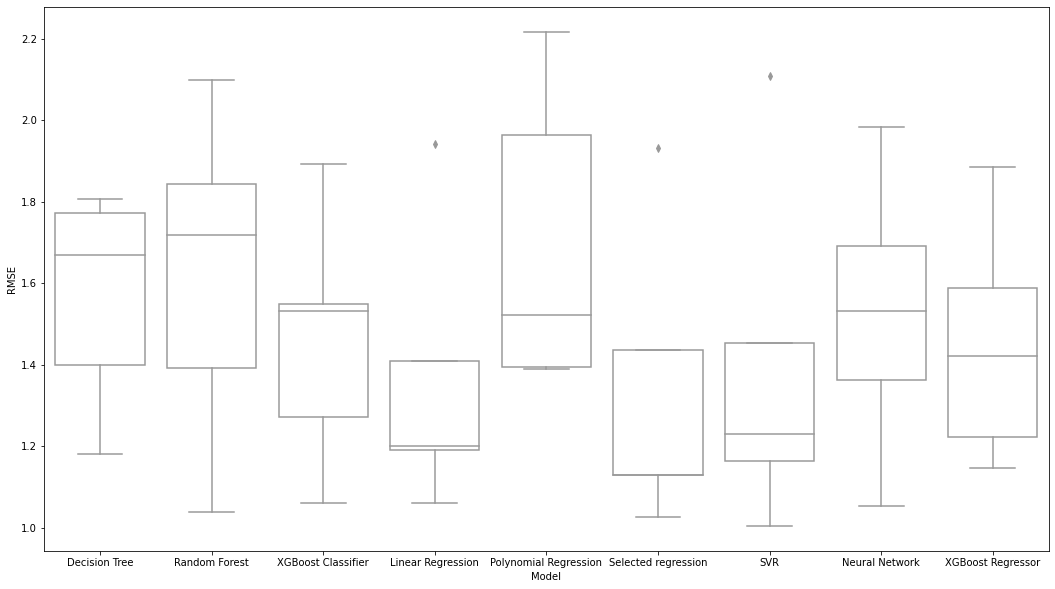

In [44]:
plt.figure(figsize=(18,10))
sns.boxplot(data=total_results_with, x="Model", y="RMSE", color="white")
plt.show()

## Modele bez wyników egzaminów

In [45]:
total_results_without.groupby("Model").describe().sort_values(by=('RMSE','mean'))

RMSE                                                    \
                      count      mean       std       min       25%       50%   
Model                                                                           
SVR                     5.0  2.698487  0.787996  1.907475  2.424237  2.446347   
Selected regression     5.0  2.759890  0.737478  2.123133  2.387467  2.414699   
Linear Regression       5.0  2.762648  0.789071  2.086587  2.345208  2.452628   
XGBoost Regressor       5.0  3.052754  0.646235  2.403523  2.710379  2.859532   
Random Forest           5.0  3.059361  0.324533  2.728764  2.837930  2.980707   
Polynomial Regression   5.0  3.094362  0.574515  2.585462  2.785954  2.890302   
Neural Network          5.0  3.287775  0.607712  2.779042  2.896948  2.903579   
Decision Tree           5.0  3.336951  0.367486  2.933887  2.956089  3.469649   
XGBoost Classifier      5.0  3.400549  0.731764  2.548001  2.907550  3.467431   

                                           
                            75%       max  
Model                                      
SVR                    2.704697  4.009678  
Selected regression    2.891632  3.982520  
Linear Regression      2.840639  4.088175  
XGBoost Regressor      3.202163  4.088175  
Random Forest          3.204564  3.544840  
Polynomial Regression  3.156190  4.053900  
Neural Network         3.712764  4.146541  
Decision Tree          3.623780  3.701351  
XGBoost Classifier     3.621517  4.458247

In [46]:
total_results_without.groupby("Model").describe().sort_values(by=('RMSE','mean')).to_latex("result_without.tex")

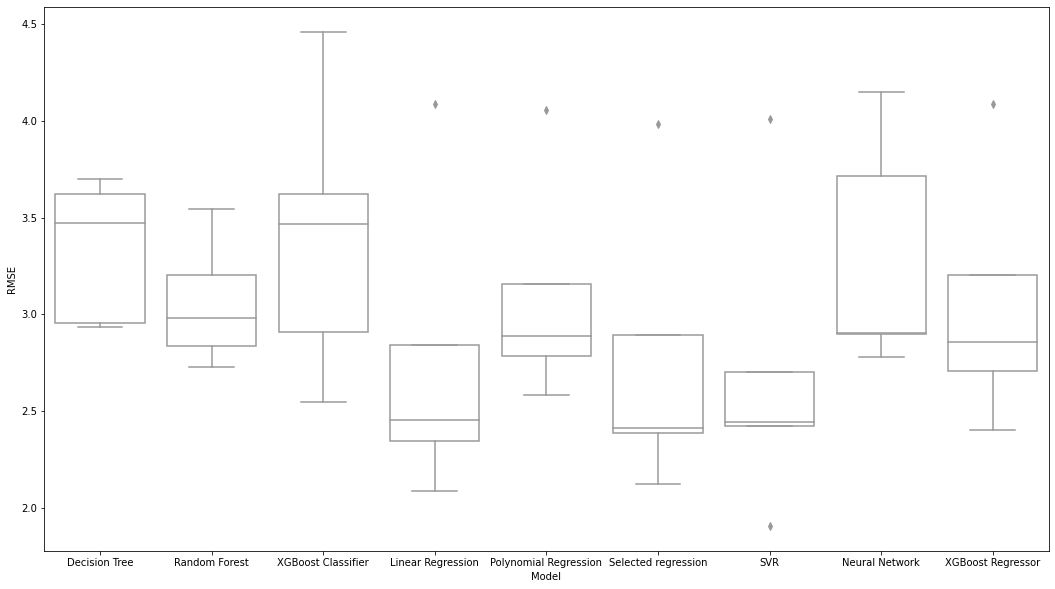

In [47]:
plt.figure(figsize=(18,10))
sns.boxplot(data=total_results_without, x="Model", y="RMSE", color="white")
plt.show()

Najlepsze modele teraz użyjemy w komitetach.
# Komitety

In [48]:
select_with = Pipeline([
                    ("Poly", poly_with),
                    ("Select", SelectKBest(f_regression, 26)),
                    ("Linreg", LinearRegression())
])

select_with = TransformedTargetRegressor(select_with, inverse_func=convert_to_int)

select_without = Pipeline([
                    ("Poly", poly_without),
                    ("Select", SelectKBest(f_regression, 26)),
                    ("Linreg", LinearRegression())
])

select_without = TransformedTargetRegressor(select_without, inverse_func=convert_to_int)

svr_with = TransformedTargetRegressor(
    SVR(C=80, gamma='scale', kernel='rbf'),
    inverse_func=convert_to_int)

svr_without = Pipeline([
    ("Standard Scaler", StandardScaler()),
    ("SVR", SVR(C=3, kernel='rbf', gamma='scale'))
])

svr_without = TransformedTargetRegressor(svr_without, inverse_func = convert_to_int)

linreg = TransformedTargetRegressor(LinearRegression(), inverse_func = convert_to_int)


ensemble_with = pd.DataFrame(columns=["Model", "RMSE"])
ensemble_without = pd.DataFrame(columns=["Model", "RMSE"])

In [49]:
estimators_with = [('Selected Regression', select_with), ('SVR', svr_with), ('Linear Regression', linreg)]
estimators_without = [('Selected Regression', select_without), ('SVR', svr_without), ('Linear Regression', linreg)]

In [51]:
from sklearn.ensemble import StackingRegressor

stacking_with = StackingRegressor(estimators=estimators_with, final_estimator=LinearRegression())
stacking_with = TransformedTargetRegressor(stacking_with, inverse_func=convert_to_int)

stacking_without = StackingRegressor(estimators=estimators_without, final_estimator=LinearRegression())
stacking_without = TransformedTargetRegressor(stacking_without, inverse_func=convert_to_int)

result_with = cross_validate(stacking_with, X_with_exams, Y, scoring=metrics, cv=5)
ensemble_with = append_to_results(ensemble_with, "Linear Regression", result_with.get('test_rmse'))

print("Stacking with exams")
avg_sd_print(result_with.get('test_rmse'))

result_without = cross_validate(stacking_without, X_without_exams, Y, scoring=metrics, cv=5)
ensemble_without = append_to_results(ensemble_without, "Linear Regression", result_without.get('test_rmse'))
print("Stacking without exams")
avg_sd_print(result_without.get('test_rmse'))

Stacking with exams
Average: 1.359
Standard deviation: 0.320
Stacking without exams
Average: 2.730
Standard deviation: 0.703


In [52]:
stacking_with = StackingRegressor(estimators=estimators_with, final_estimator=SVR())
stacking_with = TransformedTargetRegressor(stacking_with, inverse_func=convert_to_int)

stacking_without = StackingRegressor(estimators=estimators_without, final_estimator=SVR())
stacking_without = TransformedTargetRegressor(stacking_without, inverse_func=convert_to_int)

result_with = cross_validate(stacking_with, X_with_exams, Y, scoring=metrics, cv=5)
ensemble_with = append_to_results(ensemble_with, "SVR", result_with.get('test_rmse'))

print("Stacking with exams")
avg_sd_print(result_with.get('test_rmse'))

result_without = cross_validate(stacking_without, X_without_exams, Y, scoring=metrics, cv=5)
ensemble_without = append_to_results(ensemble_without, "SVR", result_without.get('test_rmse'))

print("Stacking without exams")
avg_sd_print(result_without.get('test_rmse'))

Stacking with exams
Average: 1.621
Standard deviation: 0.760
Stacking without exams
Average: 2.938
Standard deviation: 1.076


In [53]:
stacking_with = StackingRegressor(estimators=estimators_with, final_estimator=XGBRegressor())
stacking_with = TransformedTargetRegressor(stacking_with, inverse_func=convert_to_int)

stacking_without = StackingRegressor(estimators=estimators_without, final_estimator=XGBRegressor())
stacking_without = TransformedTargetRegressor(stacking_without, inverse_func=convert_to_int)

result_with = cross_validate(stacking_with, X_with_exams, Y, scoring=metrics, cv=5)
ensemble_with = append_to_results(ensemble_with, "XGB Regressor", result_with.get('test_rmse'))

print("Stacking with exams")
avg_sd_print(result_with.get('test_rmse'))

result_without = cross_validate(stacking_without, X_without_exams, Y, scoring=metrics, cv=5)
ensemble_without = append_to_results(ensemble_without, "XGB Regressor", result_without.get('test_rmse'))

print("Stacking without exams")
avg_sd_print(result_without.get('test_rmse'))

Stacking with exams
Average: 1.438
Standard deviation: 0.280
Stacking without exams
Average: 3.290
Standard deviation: 0.790


In [54]:
ensemble_with.groupby("Model").describe().sort_values(by=('RMSE','mean'))

RMSE                                                    \
                  count      mean       std       min       25%       50%   
Model                                                                       
Linear Regression   5.0  1.359486  0.357478  1.034036  1.186462  1.196148   
XGB Regressor       5.0  1.438033  0.313587  1.037749  1.218448  1.478044   
SVR                 5.0  1.621365  0.849156  1.026570  1.163549  1.400549   

                                       
                        75%       max  
Model                                  
Linear Regression  1.435806  1.944980  
XGB Regressor      1.640825  1.815096  
SVR                1.403293  3.112864

In [58]:
ensemble_with.groupby("Model").describe().sort_values(by=('RMSE','mean')).to_latex("ensemble_with.tex")

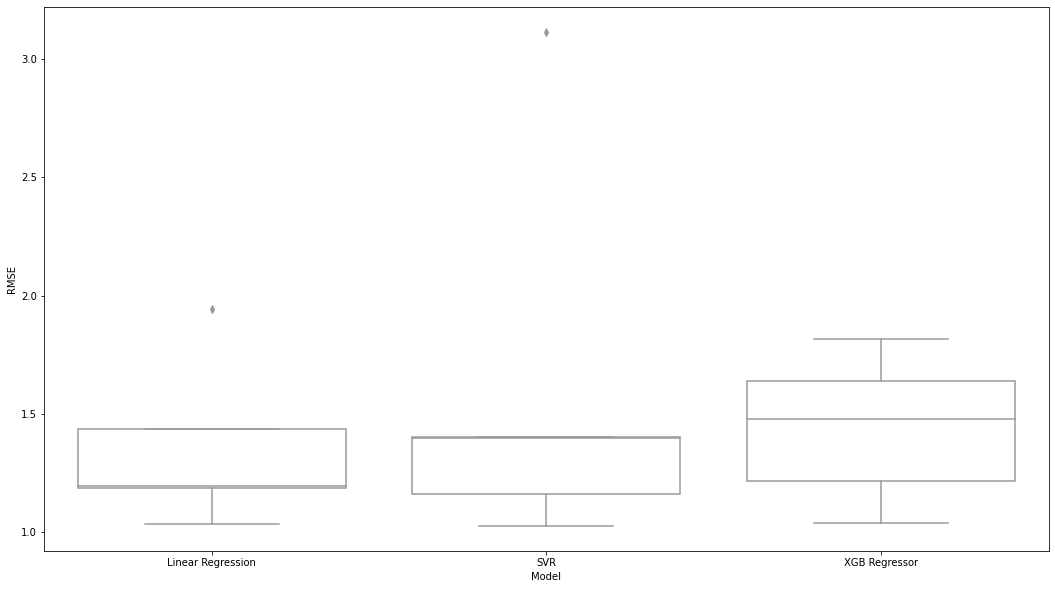

In [55]:
plt.figure(figsize=(18,10))
sns.boxplot(data=ensemble_with, x="Model", y="RMSE", color="white")
plt.show()

In [56]:
ensemble_without.groupby("Model").describe().sort_values(by=('RMSE','mean'))

RMSE                                                    \
                  count      mean       std       min       25%       50%   
Model                                                                       
Linear Regression   5.0  2.730226  0.785716  1.978733  2.379399  2.428992   
SVR                 5.0  2.938258  1.203111  2.009592  2.390687  2.506914   
XGB Regressor       5.0  3.290061  0.882723  2.189134  2.561550  3.536622   

                                       
                        75%       max  
Model                                  
Linear Regression  2.837930  4.026078  
SVR                2.747026  5.037072  
XGB Regressor      3.907586  4.255412

In [59]:
ensemble_without.groupby("Model").describe().sort_values(by=('RMSE','mean')).to_latex("ensemble_without.tex")

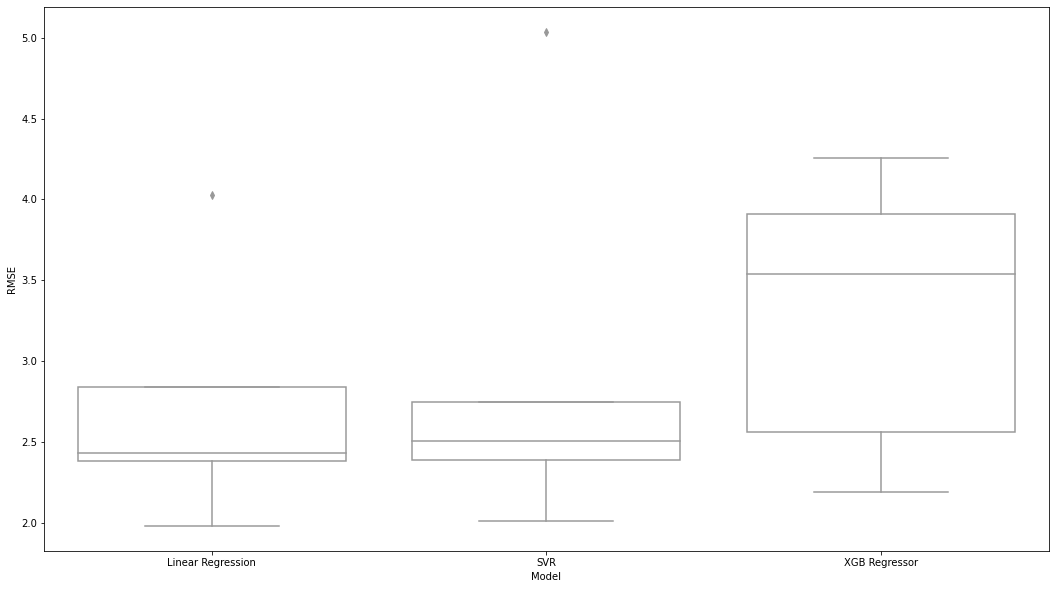

In [57]:
plt.figure(figsize=(18,10))
sns.boxplot(data=ensemble_without, x="Model", y="RMSE", color="white")
plt.show()

Komitety nie poprawiły :(.